# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

Выполнила Сергеева Александра группа 6409-010302D

Вариант 3: CIFAR-10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [2]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [5]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
b2 max relative error: 3.865070e-11


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017149607938732037


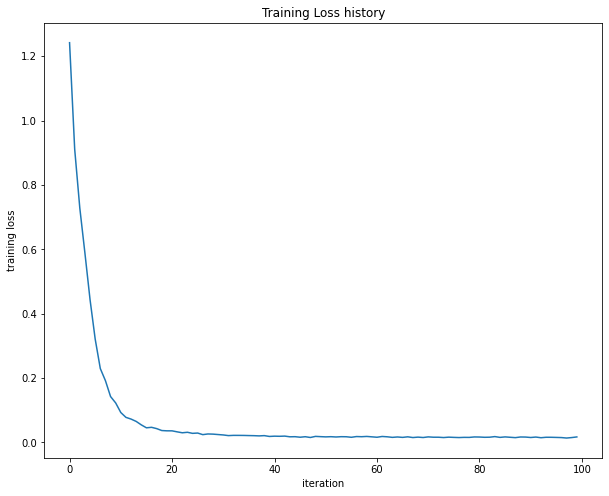

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [7]:
from scripts.data_utils import load_CIFAR10

cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

# Устанавливаем количество обучающих, валидационных, тестовых и разработочных данных
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

#Считывание данных
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Выбираем данные для валидации из обучающего набора
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Обновляем обучающий набор данных, исключая данные для валидации
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# Выбираем случайные данные для разработки из обновленного обучающего набора
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Выбираем данные для тестирования из тестового набора
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

#Количество строк остается прежним, а количество столбцов преобразуется в одномерный массив
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

#Вывод размеров
print ("X_train ",X_train.shape)
print ("y_train ",y_train.shape)
print ("X_val ",X_val.shape)
print ("y_val ",y_val.shape)
print ("X_test ",X_test.shape)
print ("y_test ",y_test.shape)
print ("X_dev ",X_dev.shape)
print ("y_dev ",y_dev.shape)

X_train  (49000, 3072)
y_train  (49000,)
X_val  (1000, 3072)
y_val  (1000,)
X_test  (1000, 3072)
y_test  (1000,)
X_dev  (500, 3072)
y_dev  (500,)


Параметры обучения методы train:

num_iters - количество итераций (эпох) обучения

batch_size - размер батча (подмножество из обучающего набора) для обучения

learning_rate - параметр, указывающий на скорость обучения

learning_rate_decay - параметр, уменьшающий скорость обучения после каждой эпохи

reg - параметр регуляризации для настройки весов

verbose - вывод информации об обучении

In [8]:
# Определяем размеры входа, скрытого слоя и количества классов
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

# Создаем экземпляр сети с двумя слоями (входной, скрытый, выходной)
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Обучаем сеть на обучающих данных и оцениваем на валидационных данных
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Вычисляем точность на валидационных данных с помощью предсказаний сети
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302968
iteration 100 / 1000: loss 2.300089
iteration 200 / 1000: loss 2.252999
iteration 300 / 1000: loss 2.144620
iteration 400 / 1000: loss 2.096257
iteration 500 / 1000: loss 2.061824
iteration 600 / 1000: loss 1.898950
iteration 700 / 1000: loss 1.954925
iteration 800 / 1000: loss 1.889887
iteration 900 / 1000: loss 1.955520
Validation accuracy:  0.312


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

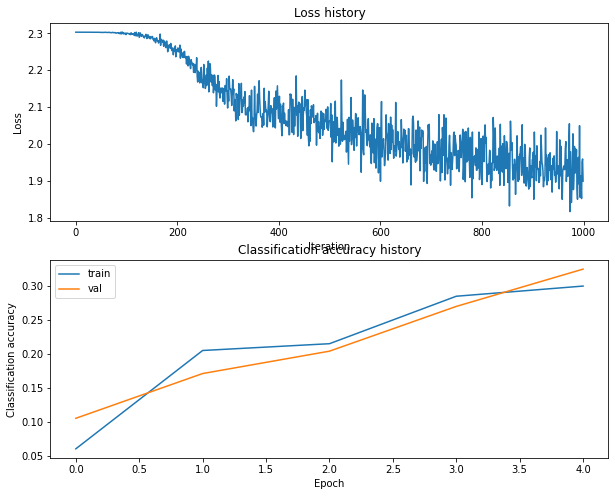

In [9]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

In [10]:
#Параметры обучения по умолчанию

# Определяем размеры входа, скрытого слоя и количества классов
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

# Создаем экземпляр сети с двумя слоями (входной, скрытый, выходной)
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Обучаем сеть на обучающих данных и оцениваем на валидационных данных
stats = net.train(X_train, y_train, X_val, y_val, verbose=True)

# Вычисляем точность на валидационных данных с помощью предсказаний сети
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 100: loss 2.302607
Validation accuracy:  0.133


In [11]:
# Определяем размеры входа, скрытого слоя и количества классов
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

# Создаем экземпляр сети с двумя слоями (входной, скрытый, выходной)
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Обучаем сеть на обучающих данных и оцениваем на валидационных данных
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=16400, batch_size=47,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=4, verbose=True)

# Вычисляем точность на валидационных данных с помощью предсказаний сети
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 16400: loss 2.308702
iteration 100 / 16400: loss 2.305265
iteration 200 / 16400: loss 2.280740
iteration 300 / 16400: loss 2.226379
iteration 400 / 16400: loss 2.109146
iteration 500 / 16400: loss 1.985371
iteration 600 / 16400: loss 2.347661
iteration 700 / 16400: loss 2.044894
iteration 800 / 16400: loss 2.074330
iteration 900 / 16400: loss 1.999174
iteration 1000 / 16400: loss 1.901182
iteration 1100 / 16400: loss 2.096685
iteration 1200 / 16400: loss 2.051332
iteration 1300 / 16400: loss 2.161635
iteration 1400 / 16400: loss 1.744234
iteration 1500 / 16400: loss 1.947992
iteration 1600 / 16400: loss 1.949994
iteration 1700 / 16400: loss 1.978065
iteration 1800 / 16400: loss 2.108482
iteration 1900 / 16400: loss 2.070201
iteration 2000 / 16400: loss 2.049678
iteration 2100 / 16400: loss 1.953781
iteration 2200 / 16400: loss 1.975351
iteration 2300 / 16400: loss 1.738682
iteration 2400 / 16400: loss 1.899930
iteration 2500 / 16400: loss 1.982438
iteration 2600 / 16400: 

In [12]:
#Лучший вариант
# Определяем размеры входа, скрытого слоя и количества классов
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

# Создаем экземпляр сети с двумя слоями (входной, скрытый, выходной)
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Обучаем сеть на обучающих данных и оцениваем на валидационных данных
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=16500, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=4, verbose=True)

# Вычисляем точность на валидационных данных с помощью предсказаний сети
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 16500: loss 2.308784


iteration 100 / 16500: loss 2.304562
iteration 200 / 16500: loss 2.211075
iteration 300 / 16500: loss 2.142055
iteration 400 / 16500: loss 2.141623
iteration 500 / 16500: loss 2.040783
iteration 600 / 16500: loss 2.055911
iteration 700 / 16500: loss 2.216165
iteration 800 / 16500: loss 2.017536
iteration 900 / 16500: loss 1.881442
iteration 1000 / 16500: loss 2.032653
iteration 1100 / 16500: loss 2.089222
iteration 1200 / 16500: loss 1.971929
iteration 1300 / 16500: loss 1.979373
iteration 1400 / 16500: loss 1.945931
iteration 1500 / 16500: loss 2.005339
iteration 1600 / 16500: loss 2.136806
iteration 1700 / 16500: loss 2.025476
iteration 1800 / 16500: loss 1.837052
iteration 1900 / 16500: loss 1.771130
iteration 2000 / 16500: loss 1.953106
iteration 2100 / 16500: loss 1.849014
iteration 2200 / 16500: loss 1.999019
iteration 2300 / 16500: loss 2.103668
iteration 2400 / 16500: loss 1.916514
iteration 2500 / 16500: loss 2.047862
iteration 2600 / 16500: loss 1.889015
iteration 2700 / 1650

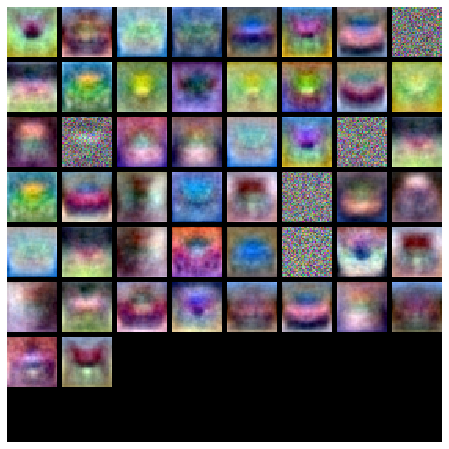

In [13]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

Сделайте выводы по результатам работы. 

При реализации класса TwoLayerNet получилось добиться следующих результатов:

Метод loss
 
- Прямой проход: вычисление выхода сети - Оценка точности с эталонными значениями = 3.6802720745909845e-08

- Прямой проход: вычисление loss - Оценка точности с эталонными значениями = 1.794120407794253e-13

- Обратный проход - Оценка точности с эталонными значениями

W1 max relative error: 8.002490e-01

W2 max relative error: 3.333333e-01

b1 max relative error: 2.738421e-09

b2 max relative error: 3.865070e-11

Благодаря реализации методов train и predict была обучена двуслойная полносвязная нейронная сеть и произведено предсказание на датасете CIFAR10:

1. В первом случае получилось добиться точности = 0.312
2. При использовании параметров обучения по умолчанию точность равна 0.133
3. При подборе наилучших параметров максимальная точность получилась 0.411(при этом увеличивалось количество эпох до 16500, уменьшался размер батча до 50, измененялся параметр регуляризации для настройки весов до 4)


